In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam

In [4]:
df= pd.read_csv('/content/drive/MyDrive//CellDNA.csv', delimiter=',', header=None)

# convert target column into binary
df.iloc[:,-1]= (df.iloc[:, -1] != 0).astype(int)

# Separate features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
# Standardization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
y= to_categorical(y,2)

In [7]:
# Define the input layer separately
input_layer = Input(shape=(13,))

# Add layers to the model, connecting them using the Functional API
h1=Dense(units=6, activation='relu', name='h1')(input_layer)
h2=Dense(units=4, activation='relu', name='h2')(h1)
h3=Dense(units=4, activation='relu', name='h3')(h2)
output_layer=Dense(units=2, activation='softmax', name='output')(h3)

In [8]:
# Create the model using Functional API
best_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
adam = Adam(learning_rate=0.01)
best_model.compile(loss='binary_crossentropy', optimizer=adam)

# Train the model
best_model.fit(X_scaled, y, epochs=30, batch_size=4, verbose=0)

In [9]:
# Extract the Z-Code (output of the last hidden layer)
z_code_model = Model(inputs=best_model.input,
                     outputs=best_model.get_layer('h3').output)
#z_code_model = Model(inputs= input_layer,outputs= h3)
z_code = z_code_model.predict(X_scaled)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [9]:
print(z_code)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [19]:
np.unique(z_code, axis=0)

array([[0., 0., 0., 0.]], dtype=float32)

In [10]:
# Reduce dataset size for t-SNE (if necessary)
'''if len(X) > 100:
    print("Dataset is large. Using a subset for t-SNE...")
    X_subset = X[:100]
    z_code_subset = z_code[:100]
    y_subset = y[:100]
else:
    X_subset = X
    z_code_subset = z_code
    y_subset = y

# Perform t-SNE on Z-Code if its dimension is greater than 2
if z_code_subset.shape[1] > 2:
    print("Running t-SNE on Z-Code...")
    tsne = TSNE(n_components=2, random_state=42)
    z_code_2d = tsne.fit_transform(z_code_subset)
else:
    z_code_2d = z_code_subset

# Perform t-SNE on the raw data (X)
print("Running t-SNE on raw data...")
tsne_raw = TSNE(n_components=2, random_state=42)
X_2d = tsne_raw.fit_transform(X_subset)'''


'if len(X) > 100:\n    print("Dataset is large. Using a subset for t-SNE...")\n    X_subset = X[:100]\n    z_code_subset = z_code[:100]\n    y_subset = y[:100]\nelse:\n    X_subset = X\n    z_code_subset = z_code\n    y_subset = y\n\n# Perform t-SNE on Z-Code if its dimension is greater than 2\nif z_code_subset.shape[1] > 2:\n    print("Running t-SNE on Z-Code...")\n    tsne = TSNE(n_components=2, random_state=42)\n    z_code_2d = tsne.fit_transform(z_code_subset)\nelse:\n    z_code_2d = z_code_subset\n\n# Perform t-SNE on the raw data (X)\nprint("Running t-SNE on raw data...")\ntsne_raw = TSNE(n_components=2, random_state=42)\nX_2d = tsne_raw.fit_transform(X_subset)'

In [11]:
# Z_code for 2-d
# sklearn tsne crushes, cannot figure out why.
#
#tsne = TSNE(n_components=2,random_state=0)

In [12]:
#tsne_z = tsne.fit_transform(z_code)

In [10]:
from umap import UMAP

In [16]:
X_scaled = StandardScaler().fit_transform(X_scaled)
z_code_scaled = StandardScaler().fit_transform(z_code)
umap_X = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=0).fit_transform(X_scaled)
umap_z = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=0).fit_transform(z_code_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [11]:
# FIRST TRY: GRAPH NOT IDEAL

# Apply UMAP to Z-Code data
umap_z = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(z_code)
# Apply UMAP to Raw Input Data
umap_raw = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [12]:
y = y.argmax(axis=1)

[ 8.476339   7.4990826 13.506033  ... 13.662628  38.512814  -1.180026 ]
[ 4.964684   8.744093   9.983273  ...  7.0783334 10.560008   7.063966 ]


[Text(0.5, 1.0, 'umap of Raw Data (X)')]

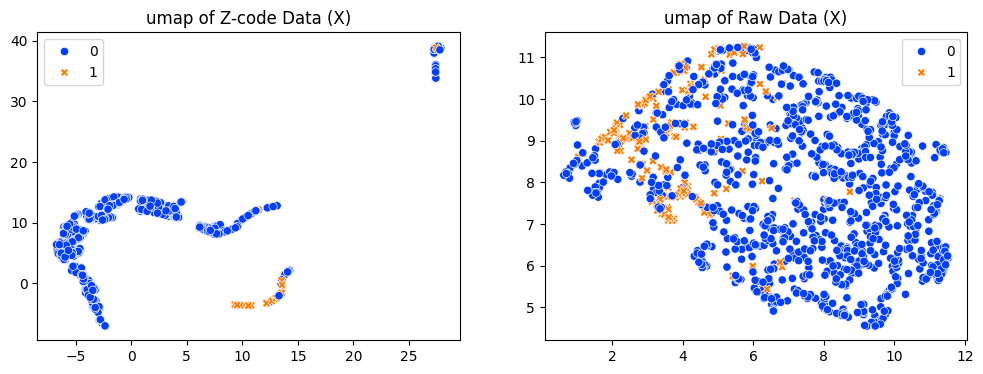

In [18]:
x1,y1= umap_z[:,0],umap_z[:,1]
x2,y2= umap_X[:,0],umap_X[:,1]
print(y1)
print(y2)

f,axes=plt.subplots(1,2,figsize=(12,4))
palette=sns.color_palette("bright",2)
sns.scatterplot(x=x1,y=y1,palette=palette, style=y, legend= 'full', hue=y,ax=axes[0]).set(title='umap of Z-code Data (X)')
sns.scatterplot(x=x2,y=y2,palette=palette, style=y, legend= 'full', hue=y,ax=axes[1]).set(title='umap of Raw Data (X)')

In [19]:
#!pip install bhtsne
from bhtsne import tsne
import seaborn as sns

In [20]:
# Convert to float64 (required by bhtsne)
X_float = X.astype(np.float64)
z_code_float = z_code.astype(np.float64)

tsne_z = tsne(z_code_float)
tsne_x = tsne(X_float)

In [21]:
x1,y1= tsne_z[:,0],tsne_z[:,1]
x2,y2= tsne_x[:,0],tsne_x[:,1]

print(y1)
print(y2)


[-13.11584814   0.78087528  12.03805849 ...   7.842936   -15.96204049
  27.05862832]
[-25.09733464 -27.16683999 -17.40214901 ...  23.71569446  19.11793187
  24.05902775]


[Text(0.5, 1.0, 'tsne of Raw Data (X)')]

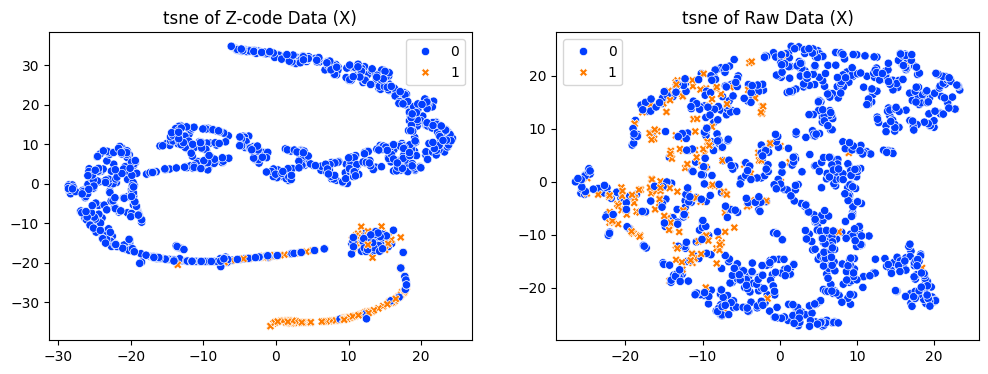

In [24]:
f,axes=plt.subplots(1,2,figsize=(12,4))
palette=sns.color_palette("bright",2)
sns.scatterplot(x=x1,y=y1,palette=palette, style=y, legend= 'full', hue=y,ax=axes[0]).set(title='tsne of Z-code Data (X)')
sns.scatterplot(x=x2,y=y2,palette=palette, style=y, legend= 'full', hue=y,ax=axes[1]).set(title='tsne of Raw Data (X)')